In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cnn_with_sentiments.csv')

In [ ]:
df_2 = pd.read_csv('cnbc_with_sentiments.csv')

In [ ]:
df_2

,headline,date,sentiment
0,A nutritionist shares her simple diet for opti...,4/13/2024,neutral
1,How climate change is beginning to be built in...,4/13/2024,neutral
2,"Apple’s franchise is very strong, speculation ...",4/12/2024,positive
3,Google removing links to California news websi...,4/12/2024,neutral
4,Wall Street heads into the week ahead on edge ...,4/12/2024,neutral
...,...,...,...
6110,Apple’s wearable gadget business grew like gan...,1/3/2022,positive
6111,Kantrowitz: As Apple hits $3 trillion in marke...,1/3/2022,neutral
6112,Dow jumps more than 200 points to record close...,1/3/2022,neutral
6113,"Amid another Covid surge, schools and business...",1/1/2022,neutral


In [ ]:
df

,headline,date,sentiment
0,The iPhone suggests a Palestinian flag when so...,"Apr 12, 2024",positive
1,"The best sales to shop this weekend: CeraVe, B...","Apr 12, 2024",neutral
2,Taylor Swift's music is back on TikTok,"Apr 12, 2024",neutral
3,Japan-U.S. relations,"Apr 11, 2024",neutral
4,"The best sales to shop today: Ninja, Cuisinart...","Apr 10, 2024",neutral
...,...,...,...
1101,Big Tech could brush off rate hikes. Startups ...,"Jan 7, 2022",neutral
1102,Classic BlackBerry phones are officially defun...,"Jan 4, 2022",neutral
1103,Apple’s warp-speed journey to $3 trillion,"Jan 4, 2022",positive
1104,Apple has become the world’s first $3 trillion...,"Jan 3, 2022",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   1106 non-null   object
 1   date       1106 non-null   object
 2   sentiment  1106 non-null   object
dtypes: object(3)
memory usage: 26.0+ KB


In [ ]:
df['date'].values[0]

'Apr 12, 2024'

In [ ]:
df['pd_date'] = pd.to_datetime(df['date'])

In [ ]:
df['pd_date']

0      2024-04-12
1      2024-04-12
2      2024-04-12
3      2024-04-11
4      2024-04-10
          ...    
1101   2022-01-07
1102   2022-01-04
1103   2022-01-04
1104   2022-01-03
1105   2022-01-03
Name: pd_date, Length: 1106, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   headline   1106 non-null   object        
 1   date       1106 non-null   object        
 2   sentiment  1106 non-null   object        
 3   pd_date    1106 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 34.7+ KB


In [ ]:
df_2

,headline,date,sentiment
0,A nutritionist shares her simple diet for opti...,4/13/2024,neutral
1,How climate change is beginning to be built in...,4/13/2024,neutral
2,"Apple’s franchise is very strong, speculation ...",4/12/2024,positive
3,Google removing links to California news websi...,4/12/2024,neutral
4,Wall Street heads into the week ahead on edge ...,4/12/2024,neutral
...,...,...,...
6110,Apple’s wearable gadget business grew like gan...,1/3/2022,positive
6111,Kantrowitz: As Apple hits $3 trillion in marke...,1/3/2022,neutral
6112,Dow jumps more than 200 points to record close...,1/3/2022,neutral
6113,"Amid another Covid surge, schools and business...",1/1/2022,neutral


In [ ]:
df_2['pd_date'] = pd.to_datetime(df_2['date'], format='%m/%d/%Y')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6115 entries, 0 to 6114
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   headline   6115 non-null   object        
 1   date       6115 non-null   object        
 2   sentiment  6115 non-null   object        
 3   pd_date    6115 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 191.2+ KB


In [ ]:
df_concat = pd.concat([df, df_2])

In [ ]:
df_concat

,headline,date,sentiment,pd_date
0,The iPhone suggests a Palestinian flag when so...,"Apr 12, 2024",positive,2024-04-12
1,"The best sales to shop this weekend: CeraVe, B...","Apr 12, 2024",neutral,2024-04-12
2,Taylor Swift's music is back on TikTok,"Apr 12, 2024",neutral,2024-04-12
3,Japan-U.S. relations,"Apr 11, 2024",neutral,2024-04-11
4,"The best sales to shop today: Ninja, Cuisinart...","Apr 10, 2024",neutral,2024-04-10
...,...,...,...,...
6110,Apple’s wearable gadget business grew like gan...,1/3/2022,positive,2022-01-03
6111,Kantrowitz: As Apple hits $3 trillion in marke...,1/3/2022,neutral,2022-01-03
6112,Dow jumps more than 200 points to record close...,1/3/2022,neutral,2022-01-03
6113,"Amid another Covid surge, schools and business...",1/1/2022,neutral,2022-01-01


In [ ]:
df_grouped = df_concat.groupby('pd_date')['sentiment'].agg(list).reset_index()

In [ ]:
df_grouped

,pd_date,sentiment
0,2022-01-01,"[neutral, neutral]"
1,2022-01-03,"[positive, positive, positive, neutral, neutra..."
2,2022-01-04,"[neutral, positive, neutral, neutral, positive..."
3,2022-01-05,"[neutral, neutral, neutral, neutral, positive,..."
4,2022-01-06,"[neutral, positive, neutral, neutral, neutral,..."
...,...,...
798,2024-04-09,"[neutral, positive, neutral, neutral, neutral,..."
799,2024-04-10,"[neutral, neutral, positive, neutral, positive..."
800,2024-04-11,"[neutral, neutral, neutral, neutral, neutral, ..."
801,2024-04-12,"[positive, neutral, neutral, positive, neutral..."


In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pd_date    803 non-null    datetime64[ns]
 1   sentiment  803 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 12.7+ KB


In [ ]:
aapl = yf.Ticker("AAPL")

aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [ ]:
aapl_hist = aapl.history(start="2022-01-01", end='2024-04-12')
aapl_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,175.359195,180.339032,175.240867,179.481110,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,180.092499,180.398189,176.631258,177.203201,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,177.114447,177.666664,172.213500,172.489609,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,170.300470,172.864351,169.255200,169.610199,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,170.487845,171.720477,168.653687,169.777847,86709100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-05 00:00:00-04:00,169.360277,170.159196,168.721145,169.350296,42055200,0.0,0.0
2024-04-08 00:00:00-04:00,168.801048,168.970816,168.012125,168.221832,37425500,0.0,0.0
2024-04-09 00:00:00-04:00,168.471483,169.849619,168.121966,169.440170,42451200,0.0,0.0


In [ ]:
aapl_hist.reset_index(inplace=True)
print(aapl_hist)

                         Date        Open        High         Low       Close  \
0   2022-01-03 00:00:00-05:00  175.359195  180.339032  175.240867  179.481110   
1   2022-01-04 00:00:00-05:00  180.092499  180.398189  176.631258  177.203201   
2   2022-01-05 00:00:00-05:00  177.114447  177.666664  172.213500  172.489609   
3   2022-01-06 00:00:00-05:00  170.300470  172.864351  169.255200  169.610199   
4   2022-01-07 00:00:00-05:00  170.487845  171.720477  168.653687  169.777847   
..                        ...         ...         ...         ...         ...   
566 2024-04-05 00:00:00-04:00  169.360277  170.159196  168.721145  169.350296   
567 2024-04-08 00:00:00-04:00  168.801048  168.970816  168.012125  168.221832   
568 2024-04-09 00:00:00-04:00  168.471483  169.849619  168.121966  169.440170   
569 2024-04-10 00:00:00-04:00  168.571357  168.860957  166.883644  167.552734   
570 2024-04-11 00:00:00-04:00  168.111980  175.222347  167.932232  174.802902   

        Volume  Dividends  

In [ ]:
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          571 non-null    datetime64[ns, America/New_York]
 1   Open          571 non-null    float64                         
 2   High          571 non-null    float64                         
 3   Low           571 non-null    float64                         
 4   Close         571 non-null    float64                         
 5   Volume        571 non-null    int64                           
 6   Dividends     571 non-null    float64                         
 7   Stock Splits  571 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 35.8 KB


In [ ]:
aapl_hist['Date'] = aapl_hist['Date'].dt.tz_convert(None)

In [ ]:
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          571 non-null    datetime64[ns]
 1   Open          571 non-null    float64       
 2   High          571 non-null    float64       
 3   Low           571 non-null    float64       
 4   Close         571 non-null    float64       
 5   Volume        571 non-null    int64         
 6   Dividends     571 non-null    float64       
 7   Stock Splits  571 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 35.8 KB


In [ ]:
aapl_hist['Date'] = aapl_hist['Date'].dt.date

In [ ]:
aapl_hist['Date'] = pd.to_datetime(aapl_hist['Date'])

In [ ]:
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          571 non-null    datetime64[ns]
 1   Open          571 non-null    float64       
 2   High          571 non-null    float64       
 3   Low           571 non-null    float64       
 4   Close         571 non-null    float64       
 5   Volume        571 non-null    int64         
 6   Dividends     571 non-null    float64       
 7   Stock Splits  571 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 35.8 KB


In [ ]:
df_grouped['Date'] = df_grouped['pd_date']

In [ ]:
df_merged = pd.merge(aapl_hist, df_grouped, on='Date', how='inner')

In [ ]:
df_merged.to_csv('lstm_sentiment_cnn_cnbc.csv')

In [ ]:
df_merged

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,pd_date,sentiment
0,2022-01-03,175.359195,180.339032,175.240867,179.481110,104487900,0.0,0.0,2022-01-03,"[positive, positive, positive, neutral, neutra..."
1,2022-01-04,180.092499,180.398189,176.631258,177.203201,99310400,0.0,0.0,2022-01-04,"[neutral, positive, neutral, neutral, positive..."
2,2022-01-05,177.114447,177.666664,172.213500,172.489609,94537600,0.0,0.0,2022-01-05,"[neutral, neutral, neutral, neutral, positive,..."
3,2022-01-06,170.300470,172.864351,169.255200,169.610199,96904000,0.0,0.0,2022-01-06,"[neutral, positive, neutral, neutral, neutral,..."
4,2022-01-07,170.487845,171.720477,168.653687,169.777847,86709100,0.0,0.0,2022-01-07,"[neutral, positive, neutral, neutral]"
...,...,...,...,...,...,...,...,...,...,...
566,2024-04-05,169.360277,170.159196,168.721145,169.350296,42055200,0.0,0.0,2024-04-05,"[neutral, positive, neutral, positive, negativ..."
567,2024-04-08,168.801048,168.970816,168.012125,168.221832,37425500,0.0,0.0,2024-04-08,"[neutral, neutral, neutral, neutral, neutral]"
568,2024-04-09,168.471483,169.849619,168.121966,169.440170,42451200,0.0,0.0,2024-04-09,"[neutral, positive, neutral, neutral, neutral,..."
569,2024-04-10,168.571357,168.860957,166.883644,167.552734,49709300,0.0,0.0,2024-04-10,"[neutral, neutral, positive, neutral, positive..."


In [ ]:
def count_sentiments(sentiment_list):
  counts = {'positive': 0, 'negative': 0, 'neutral': 0}
  for sent in sentiment_list:
    if sent in counts:
      counts[sent] += 1
  return pd.Series([counts['positive'], counts['negative'], counts['neutral']], index=['positive', 'negative', 'neutral'])
df_merged[['positive', 'negative', 'neutral']] = df_merged['sentiment'].apply(count_sentiments)

In [ ]:
df_merged

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,pd_date,sentiment,positive,negative,neutral
0,2022-01-03,175.359195,180.339032,175.240867,179.481110,104487900,0.0,0.0,2022-01-03,"[positive, positive, positive, neutral, neutra...",9,0,6
1,2022-01-04,180.092499,180.398189,176.631258,177.203201,99310400,0.0,0.0,2022-01-04,"[neutral, positive, neutral, neutral, positive...",10,1,11
2,2022-01-05,177.114447,177.666664,172.213500,172.489609,94537600,0.0,0.0,2022-01-05,"[neutral, neutral, neutral, neutral, positive,...",1,0,11
3,2022-01-06,170.300470,172.864351,169.255200,169.610199,96904000,0.0,0.0,2022-01-06,"[neutral, positive, neutral, neutral, neutral,...",1,1,5
4,2022-01-07,170.487845,171.720477,168.653687,169.777847,86709100,0.0,0.0,2022-01-07,"[neutral, positive, neutral, neutral]",1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2024-04-05,169.360277,170.159196,168.721145,169.350296,42055200,0.0,0.0,2024-04-05,"[neutral, positive, neutral, positive, negativ...",5,3,5
567,2024-04-08,168.801048,168.970816,168.012125,168.221832,37425500,0.0,0.0,2024-04-08,"[neutral, neutral, neutral, neutral, neutral]",0,0,5
568,2024-04-09,168.471483,169.849619,168.121966,169.440170,42451200,0.0,0.0,2024-04-09,"[neutral, positive, neutral, neutral, neutral,...",2,2,8
569,2024-04-10,168.571357,168.860957,166.883644,167.552734,49709300,0.0,0.0,2024-04-10,"[neutral, neutral, positive, neutral, positive...",4,0,3


In [ ]:
sum(df_merged['negative'])

549

In [ ]:
columns_to_scale = ['Close', 'positive',	'negative',	'neutral']

In [ ]:
scaler = StandardScaler()

In [ ]:
df_merged[['Close_scaled', 'positive_scaled',	'negative_scaled',	'neutral_scaled']] = scaler.fit_transform(df_merged[columns_to_scale])

In [ ]:
df_merged[['Close_scaled', 'positive_scaled',	'negative_scaled',	'neutral_scaled']]

,Close_scaled,positive_scaled,negative_scaled,neutral_scaled
0,0.835441,1.472679,-0.667935,-0.226753
1,0.708159,1.752327,0.026766,1.202343
2,0.444778,-0.764500,-0.667935,1.202343
3,0.283885,-0.764500,0.026766,-0.512572
4,0.293253,-0.764500,-0.667935,-1.084211
...,...,...,...,...
566,0.269363,0.354090,1.416167,-0.512572
567,0.206308,-1.044148,-0.667935,-0.512572
568,0.274385,-0.484853,0.721467,0.344885
569,0.168921,0.074442,-0.667935,-1.084211


In [ ]:
data = df_merged[['Close_scaled', 'positive_scaled',	'negative_scaled',	'neutral_scaled']].values

In [ ]:
data

array([[ 0.83544126,  1.47267939, -0.66793462, -0.22675325],
       [ 0.70815882,  1.75232686,  0.02676605,  1.20234287],
       [ 0.44477793, -0.76450034, -0.66793462,  1.20234287],
       ...,
       [ 0.27438479, -0.48485288,  0.72146672,  0.34488519],
       [ 0.16892074,  0.07444206, -0.66793462, -1.08421093],
       [ 0.57403757, -0.48485288, -0.66793462, -0.22675325]])

In [ ]:
window_size = 10

X, y = [], []

for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, :])
    y.append(data[i, :])

In [ ]:
X, y = np.array(X), np.array(y)

In [ ]:
X.shape

(561, 10, 4)

In [ ]:
train_split = 0.6
validation_split = 0.2
test_split = 0.2

train_split_index = int(len(data) * train_split)
validation_split_index = int(len(data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 342
Rozmiar zbioru walidacyjnego: 114
Rozmiar zbioru testowego: 105


In [ ]:
X_train.shape

(342, 10, 4)

In [ ]:
# pip install hyperas

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [ ]:
def create_model(X_train, Y_train, X_validation, Y_validation):
    model_lstm = tf.keras.models.Sequential()
    model_lstm.add(tf.keras.layers.LSTM(units={{choice([5, 20, 80])}}, return_sequences=True, input_shape=(X_train.shape[1], 4)))
    model_lstm.add(tf.keras.layers.Dropout({{uniform(0, 0.5)}}))
    model_lstm.add(tf.keras.layers.LSTM(units={{choice([5, 20, 80])}}))
    model_lstm.add(tf.keras.layers.Dropout({{uniform(0, 0.5)}}))
    model_lstm.add(tf.keras.layers.Dense(units={{choice([5, 20, 80])}}, activation={{choice(['relu', 'tanh'])}}))
    model_lstm.add(tf.keras.layers.Dropout({{uniform(0, 0.5)}}))
    model_lstm.add(tf.keras.layers.Dense(units=1))

    optimizer = tf.keras.optimizers.Adam(learning_rate={{choice([0.001, 0.01, 0.0001])}})

    model_lstm.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
    model_lstm.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history_lstm = model_lstm.fit(X_train, Y_train, epochs=100, batch_size={{choice([1, 2, 4])}},
                                  validation_data=(X_validation, Y_validation),
                                  callbacks=[early_stopping])
    val_accuracy = np.amax(history_lstm.history['val_acc'])
    print("best accuracy", val_accuracy)
    return {'loss': -val_accuracy, 'status': STATUS_OK, 'model': model_lstm}


In [ ]:
def data():

    return X_train, Y_train, X_validation, Y_validation

In [ ]:
# data()

In [ ]:
best_run, best_model = optim.minimize(model=create_model,
                                         data=data,
                                         algo=tpe.suggest,
                                         max_evals=5,
                                         trials=Trials(),
                                         notebook_name='sentiment_analysis')

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import yfinance as yf
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from google.colab import drive
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import LSTM, Dense
except:
    pass

try:
    from tensorflow.keras.optimizers import Adam
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from hyperopt import hp
except:
    pass

try:
    from hyperopt import fmin, tpe, Trials
excep

ERROR:hyperopt.fmin:job exception: name 'X_train' is not defined


  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]


NameError: name 'X_train' is not defined

In [ ]:
# pip install hyperopt==0.2.5


In [ ]:
model_lstm.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 9ms/step - loss: 1.0943 - mae: 0.8009


[1.0943111181259155, 0.8008744120597839]

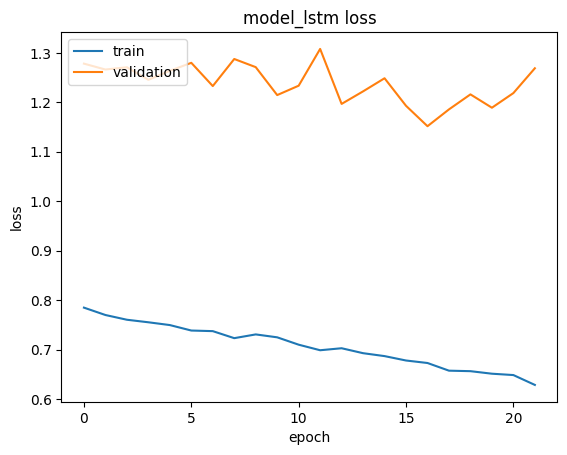

In [ ]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model_lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Przyklad z optymalizacja hiperparametrow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

def lstm_model(params):
    model = Sequential()
    model.add(LSTM(params['units'], activation='relu', input_shape=(input_shape)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='mse')

    # Assume X_train, y_train, X_val, y_val are predefined and prepared
    result = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'],
                       validation_data=(X_val, y_val), verbose=0)

    validation_loss = np.amin(result.history['val_loss'])
    print('Best validation loss of epoch:', validation_loss)
    return {'loss': validation_loss, 'status': hyperopt.STATUS_OK, 'model': model}

In [ ]:
from hyperopt import hp

space = {
    'units': hp.choice('units', [50, 100, 200]),
    'batch_size': hp.choice('batch_size', [16, 32, 64]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'epochs': hp.choice('epochs', [10, 20, 50])
}

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(lstm_model,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  # Set this to a higher number for more thorough search
            trials=trials)

print("Best hyperparameters:", best)